#VISHVJEET THAKUR
##vishwjeetthakur995@gmail.com  
##9310334736
##PEC(Punjab Engineering College, Chandigarh)

#Language Model Training - Joke Generator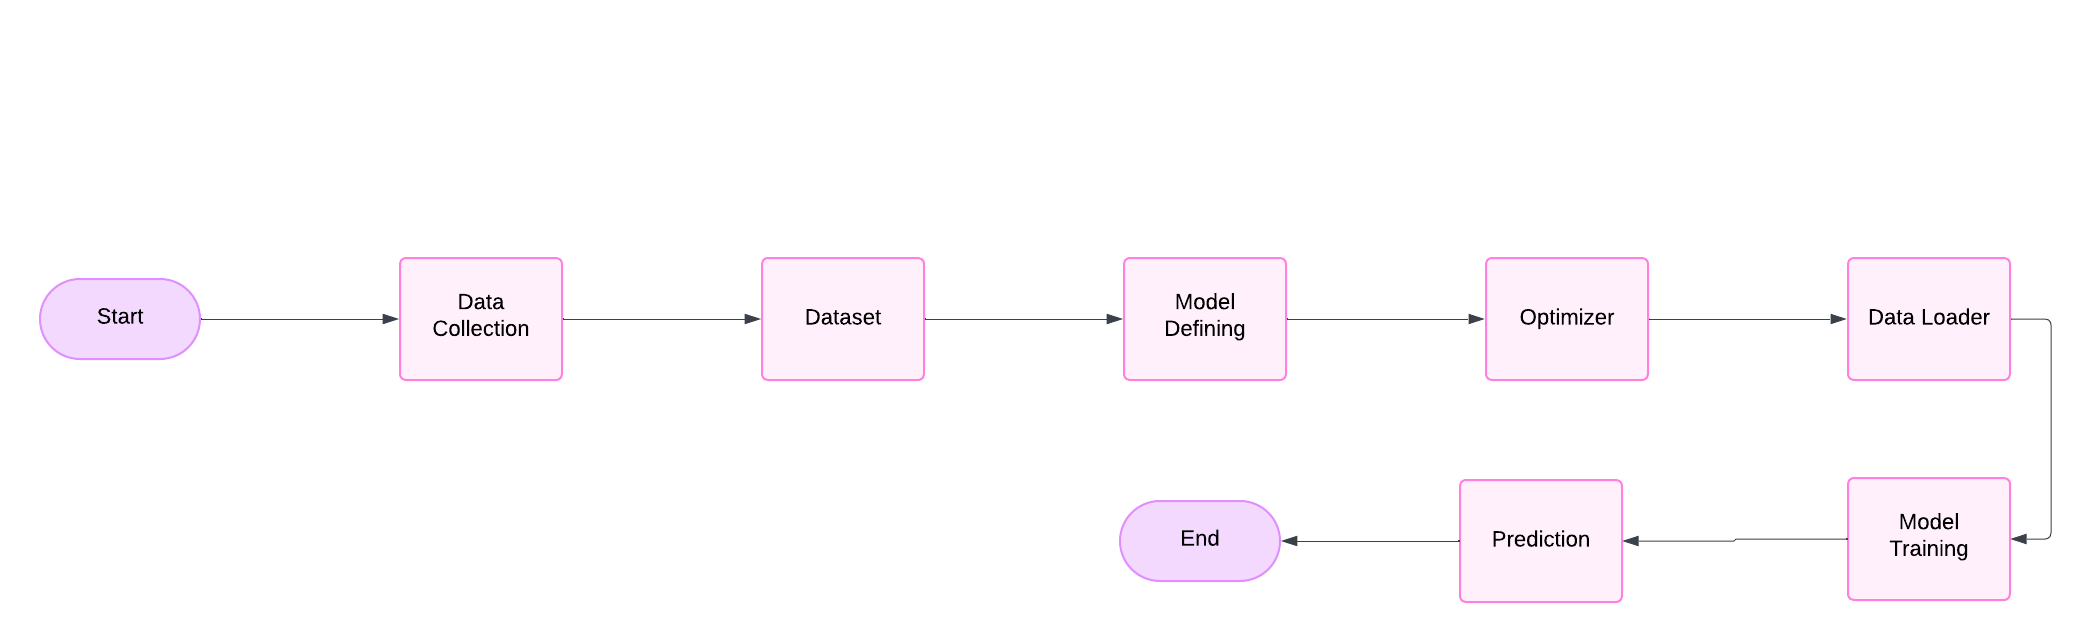

##Data Collection-
We will  scrap jokes from a website having but the websites show more codes dynamically , for that we need a tool that can mimic a browser and clicks on 'load more' button to generate more jokes . For that tool or software we can use selenium. We will scrape around 3000 jokes for the demo purpose , as it will be having smaller vocabulary.

What is Selenium?
Selenium is a tool that mimics human interaction with a web browser. It can:

Click buttons (like "Load More" buttons)
Scroll the page to load additional content
Scrape dynamic data (like jokes that are loaded after clicking)

Other Alternatives that we may have used: Beautiful soup along with requests library of Python and Scrapy too as it has some very good prebuild modules which makes the scraping easy.

How Are We Collecting the Jokes?
Open the Jokes Website: We use Selenium to navigate to the jokes page.
->Click the “Load More” Button: Each time we click it, new jokes are loaded.->
Scroll to View New Content: We scroll the page to bring the "Load More" button into view.->
Collect the Jokes: Each joke is extracted from the page and saved to a text file.

In [ ]:
!apt-get update
!apt-get install -y chromium-browser chromium-chromedriver
!pip install selenium webdriver-manager

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,454 kB]
Get:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:13 https://r2u.stat.illinois

In [ ]:
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb && apt install ./google-chrome-stable_current_amd64.deb

--2024-12-07 16:36:58--  https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
Resolving dl.google.com (dl.google.com)... 74.125.196.190, 74.125.196.91, 74.125.196.136, ...
Connecting to dl.google.com (dl.google.com)|74.125.196.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112377704 (107M) [application/x-debian-package]
Saving to: ‘google-chrome-stable_current_amd64.deb’

google-chrome-stabl 100%[===================>] 107.17M   117MB/s    in 0.9s    

2024-12-07 16:36:59 (117 MB/s) - ‘google-chrome-stable_current_amd64.deb’ saved [112377704/112377704]

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'google-chrome-stable' instead of './google-chrome-stable_current_amd64.deb'
The following additional packages will be installed:
  libvulkan1 mesa-vulkan-drivers
The following NEW packages will be installed:
  google-chrome-stable libvulkan1 mesa-vulkan-drivers
0 upgraded, 3

In [ ]:
import os

# Set paths for Chrome and ChromeDriver
os.environ['PATH'] += ':/usr/lib/chromium-browser/'
os.environ['PATH'] += ':/usr/bin/'

In [ ]:
import time
import random
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager


def create_driver():
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--disable-extensions')
    chrome_options.add_argument('--remote-debugging-port=9222')
    chrome_options.add_argument('--disable-gpu')
    chrome_options.add_argument('--disable-software-rasterizer')


    chrome_options.binary_location = '/usr/bin/chromium-browser'


    driver = webdriver.Chrome(service=Service('/usr/bin/chromedriver'), options=chrome_options)
    return driver


In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

def get_all_content():
    driver = create_driver()
    driver.get('https://www.laughfactory.com/jokes')
    click_count=0
    while click_count<501:
        try:
            load_more_button = driver.find_element(By.XPATH, "//a[@id='loaderBtn']")
            driver.execute_script("arguments[0].scrollIntoView({behavior: 'smooth', block: 'center'});", load_more_button)
            time.sleep(0.15)
            load_more_button.click()
            time.sleep(0.15)
            click_count+=1
        except Exception as e:
            print(f"error- {e}")
            break
    jokes = driver.find_elements(By.XPATH, "//p[starts-with(@id, 'joke_')]")
    jokes_collected = len(jokes)
    print(f"Jokes collected: {jokes_collected}")

    with open("laugh_factory_jokes.txt", "w") as file:
          for joke in jokes:
            file.write(joke.text.strip() + '\n')
    print(f"Saved {len(jokes)} jokes to file.")
    driver.quit()

get_all_content()


Jokes collected: 3012
Saved 3012 jokes to file.


## Data Preprocessing
All jokes are saved in a file -  laugh_factory_jokes.txt, now we need to process it a little bit as few jokes cover two line so we will make them in one line, other than this not much processing is require , we can process it a little bit but lets not so that we can try to make it more human.

In [ ]:
import re
def combine_qa_lines(input_file, output_file):
    """Combines Q: and A: parts in a single line."""
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            if line.startswith("Q:"):
                if "A:" in line:
                  outfile.write(line)
                else:
                  line = re.sub(r'\n$', ' ', line)
                  outfile.write(line)
            else:
                outfile.write(line)

input_file = "laugh_factory_jokes.txt"
output_file = "laugh_factory_jokes_mod.txt"
combine_qa_lines(input_file, output_file)

##  Creating a custom dataset:
Transforming the .txt file into a custom data set which our model can easily use to train upon.
# Process
Tokenize the text — Convert words into numbers using a pre-trained GPT2TOkenizer.->
Pad or truncate the sequences — Ensure every joke fits within a fixed length (like 512 tokens)->
Create a dataset class — This class will help load the jokes in batches for training.

In [ ]:
import torch
from torch.utils.data import Dataset
from transformers import GPT2Tokenizer


class JokeDataset(Dataset):
    def __init__(self, file_path, tokenizer, max_length=512):
        with open(file_path, 'r') as file:
            self.jokes = file.readlines()

        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.jokes)

    def __getitem__(self, idx):
        joke = self.jokes[idx]

        # Subword tokenize the joke
        encoding = self.tokenizer(joke,
                                  max_length=self.max_length,
                                  padding='max_length',
                                  truncation=True,
                                  return_tensors='pt')

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {'input_ids': input_ids, 'attention_mask': attention_mask}


tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.model_max_length = 512
tokenizer.pad_token = tokenizer.eos_token
tokenizer.bos_token = tokenizer.eos_token


joke_dataset = JokeDataset(file_path='laugh_factory_jokes_mod.txt', tokenizer=tokenizer)


print(joke_dataset[0])


## Defining Model Architecture :
Here we will be defining model architecture like how it will be initialized and how it will move forward while training.
# Transformer Architecture
We are using transformers here as it is best in remembering the  context because of the attention mechanism it uses.
And this is used by almost all LLMs .
# Components in this model


*   Embedding layer
*   Transformer Encoder
*   Fully Connected Layer
*   Forward Pass







In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class JokeGeneratorModel(nn.Module):
    def __init__(self, vocab_size, embed_dim=256, num_heads=8, num_layers=4, max_length=512):
        """
        Arguments:
        - vocab_size: Size of the vocabulary
        - embed_dim: Dimension of embeddings for tokens
        - num_heads: Number of attention heads in the Transformer
        - num_layers: Number of Transformer blocks (layers)
        - max_length: Maximum sequence length
        """
        super(JokeGeneratorModel, self).__init__()

        # Embedding layer
        self.token_embedding = nn.Embedding(vocab_size, embed_dim)
        self.position_embedding = nn.Embedding(max_length, embed_dim)

        # Transformer layer
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Linear layer to convert hidden states to logits for each token in the vocab
        self.fc_out = nn.Linear(embed_dim, vocab_size)

    def forward(self, x):
        """
        Arguments:
        - x: Tensor of shape (batch_size, sequence_length) containing token indices

        Returns:
        - logits: Tensor of shape (batch_size, sequence_length, vocab_size)
        """
        batch_size, seq_len = x.size()

        # Create token embeddings and position embeddings
        token_embeds = self.token_embedding(x)
        position_ids = torch.arange(0, seq_len, device=x.device).unsqueeze(0).repeat(batch_size, 1)
        position_embeds = self.position_embedding(position_ids)

        # Combine embeddings and pass through the Transformer
        x = token_embeds + position_embeds
        x = x.permute(1, 0, 2)
        transformer_output = self.transformer(x)

        x = transformer_output.permute(1, 0, 2)

        # Generate logits for each position in the sequence
        logits = self.fc_out(x)

        return logits


## Defining Optimizer
Here we will declare a optimizer  which will help us during training to optimize weights according to loss.
The optimizer updates the weights of the model after each step of backpropagation. It decides how much to adjust the weights to reduce the loss.
# AdamW
The optimizer used here is AdamW.
AdamW is a variant of the Adam optimizer that decouples L2 weight decay from the gradient update rule.
This helps prevent overfitting and makes the optimizer more stable for training deep models.
# Loss Function
The loss function compares the predicted tokens to the target tokens. Since we have sequential data, we use Cross-Entropy Loss.
Compares the predicted logits  of the model to the ground-truth tokens.
# Use of GPU(CUDA)
Since Transformers have millions of parameters, training on a CPU would be very slow.
By moving the model to GPU (CUDA), training can be accelerated with parallel computations on NVIDIA GPU

In [ ]:
import torch
from transformers import AdamW

#Hyperparameters
VOCAB_SIZE = 50257
EMBED_DIM = 256
NUM_HEADS = 8
NUM_LAYERS = 4
MAX_LENGTH = 512

#Initialize the Model
model = JokeGeneratorModel(
    vocab_size=VOCAB_SIZE,
    embed_dim=EMBED_DIM,
    num_heads=NUM_HEADS,
    num_layers=NUM_LAYERS,
    max_length=MAX_LENGTH
)

# Move Model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
print(f"Using device: {device}")

# Loss Function

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=0)

# 5. Optimizer
optimizer = AdamW(model.parameters(), lr=1e-4, weight_decay=0.01)


## Dataloder:
The DataLoader is a crucial component of the training process. It feeds data to the model in batches, ensuring smooth and efficient training. However, if GPU runs out of memory , training will crash. To avoid this, we introduce dynamic batch size adjustment.
# Steps:
Start with Initial Batch Size (default = 16). ->
Test if it fits in memory. ->
If it doesn't fit, reduce the batch size by half and try again. ->
Repeat until it fits or the batch size reaches the minimum (default = 1).

In [ ]:
import torch
from torch.utils.data import DataLoader

def create_dataloader(dataset, initial_batch_size=16, min_batch_size=1):

    batch_size = initial_batch_size

    while batch_size >= min_batch_size:
        try:
            print(f"Trying batch size: {batch_size}")
            dataloader = DataLoader(
                dataset=dataset,
                batch_size=batch_size,
                shuffle=True,
            )

            for batch in dataloader:
                inputs = batch['input_ids'].to('cuda')
                targets = batch['attention_mask'].to('cuda')
                print(f"✅ Batch size {batch_size} fits in memory!")
                return dataloader

        except RuntimeError as e:
            if 'out of memory' in str(e):
                print(f"Batch size {batch_size} is too large, reducing by half...")
                torch.cuda.empty_cache()
                batch_size //= 2
            else:
                print(f" Unexpected error: {e}")
                break

    print(f"Could not fit any batch size larger than {min_batch_size}. Using batch size {batch_size}.")
    dataloader = DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        shuffle=True,
        collate_fn=lambda x: x
    )
    return dataloader


In [ ]:
dataloader = create_dataloader(joke_dataset, initial_batch_size=16)

🟢 Trying batch size: 16
✅ Batch size 16 fits in memory!


## Training:
This script focuses on loading a checkpoint if available and training the model on the dataset. The key idea is to ensure training resumes from the last saved epoch if interrupted. This approach is useful for long-running training jobs where you want to avoid restarting from scratch in case of an interruption.
# Steps of Training:

* Epoch Loop: Loop from epoch_start to epoch_start + epochs.
* Batch Loop: Process batches using DataLoader and TQDM for a progress bar.
* Loss Calculation: Calculate loss using CrossEntropyLoss.
* Backward Pass: Backpropagate loss to compute gradients.
* Optimizer Step: Update the model's parameters.
* Loss Tracking: Keep track of total loss for each epoch

In [ ]:
from tqdm import tqdm
import torch

def load_checkpoint(model, optimizer, checkpoint_path):
    if os.path.isfile(checkpoint_path):
        print(f"Loading checkpoint from {checkpoint_path}")
        checkpoint = torch.load(checkpoint_path)
        try:
            model.load_state_dict(checkpoint['model_state_dict'])
            optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        except KeyError:

            try:
                model.load_state_dict(checkpoint)
                optimizer.load_state_dict()

            except:
                print("Unable to load model state.")
                return model, optimizer, 0

        epoch_start = checkpoint['epoch']
        print(f"Resuming from epoch {epoch_start + 1}")
        return model, optimizer, epoch_start
    else:
        print("No checkpoint found, starting from 0 ")
        return model, optimizer, 0




def train(model, dataloader, optimizer, epochs=5,epoch_start=0, device='cuda'):

    checkpoint_path = f"jgen_epoch_{epoch_start-1}.pth"
    model, optimizer, epoch_start = load_checkpoint(model, optimizer, checkpoint_path)
    model.train()



    for epoch in range(epoch_start,epoch_start+epochs):
        print(f"\nEpoch {epoch+1}/{epochs+epoch_start}")
        total_loss = 0


        for batch in tqdm(dataloader, desc=f"Training epoch {epoch+1}"):

            inputs = batch['input_ids'].to(device)
            targets = inputs[:, 1:].contiguous()

            attention_mask = batch['attention_mask'].to(device)
            attention_mask = attention_mask[:, 1:].contiguous()

            optimizer.zero_grad()


            outputs = model(inputs[:,:-1])

            outputs = outputs.view(-1, outputs.size(-1))
            targets = targets.view(-1)
            print("outputs-",outputs," targets- ",targets)
            loss = loss_fn(outputs, targets)


            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        print(f"Average Loss for epoch {epoch+1}: {avg_loss}")

        torch.save({
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, f"jgen_epoch_{epoch+1}.pth")
        print(f"Model saved for epoch {epoch+1}")


train(model, dataloader, optimizer, epochs=3,epoch_start=26)


##Prediction / Evaluation:
Here we will predict or basically evaluate the model for the output it generate for a given prompt.

# Steps:
* Load Model & Tokenizer -Load the trained checkpoint.
* Input Prompt- Provide an initial phrase as input. Tokenize the input and prepare it for input to the model.
* Text Generation - Use top-k sampling to introduce randomness, making the jokes more creative.Use temperature to control randomness
* Decoding and Display - Convert the tokenized output back to readable text using the tokenizer.



In [ ]:
import torch
import torch.nn.functional as F

def generate_joke(prompt, model, vocab, max_length=100, temperature=0.9, top_k=50, device='cuda'):

    model.eval()
    input_ids = tokenizer(prompt, return_tensors="pt")["input_ids"].to(device)

    generated_ids = input_ids
    print("generated ids",generated_ids)


    for _ in range(max_length):

        logits = model(generated_ids)[:, -1, :]
        logits = logits / temperature
        print("logits",logits)

        if top_k > 0:
            values, indices = torch.topk(logits, top_k)
            probs = F.softmax(values, dim=-1)
            next_token = torch.multinomial(probs, 1)
            next_token = indices.gather(-1, next_token)
        else:
            next_token = logits.argmax(dim=-1)

        print(f"Next Token: {next_token}")

        generated_ids = torch.cat([generated_ids, next_token], dim=1)
        print(f"Generated Tokens: {generated_ids}")

        if next_token.item() == tokenizer.eos_token_id:
            break


    generated_tokens = generated_ids.squeeze().cpu().numpy().tolist()
    joke = tokenizer.decode(generated_tokens, skip_special_tokens=True)

    return joke



prompt = "one day"
vocab = tokenizer.get_vocab()
print(vocab)
checkpoint_path = "jgen_epoch_25.pth"
model, optimizer, epoch_start = load_checkpoint(model, optimizer, checkpoint_path)

generated_joke = generate_joke(prompt, model, vocab)
print(f"Generated Joke: {generated_joke}")


##Deployment
Now it can be deployed on multiple platforms accordingly: *like on cloud platforms GCP or AWS sagemaker, Web platforms like heroku, and by some compression on edge devices like mobiles and laptops too . And there are many other platforms too on which it can be deployed.*

##Tools used
* Deep learning framework - Pytorch
* Transformer by Hugging Face
* Selenium for web Scrapping
* And many other techniques like Softmax, Top-K Sampling , Greedy Search , Adam Optimization

## Challenges
* Dataset Collection - Finding the dataset which is good enough as a custom dataset for model training is really difficult
* Model Training - Transfomers are computationally expensive and in terms of memory too because  it needs to store many different type of data like attention , weights etc.
* Resource Constraints - Due to lesser computational power locally available and very limit power on the free version of google collab make it more difficult for training as after limit we have to stop the training process completely and on collab loosing the file is one  more difficulty.
* Evaluation - Unlike other machine learning models where they have proper evaluating matrices available , these natural langage models often rely on the human feedbacks.

* Similarly there are few other challenges too.

In [2]:
!git config --global user.email "vishwjeetthakur995@gmail.com"
!git config --global user.name "vishvjeet thakur"
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/vishvjeet-thakur/Joke-Generator-Model.git
!git push -u origin main


Reinitialized existing Git repository in /content/.git/
fatal: pathspec 'README.md' did not match any files
On branch main
nothing to commit, working tree clean
error: remote origin already exists.
fatal: could not read Username for 'https://github.com': No such device or address


In [4]:
# !git remote add origin https://github.com/vishvjeet-thakur/Joke-Generator-Model.git
# !git branch -M main
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
